# Clasificación - Ataques Cardíacos

**CONTEXTO:**

Las enfermedades cardiovasculares (ECV) son la principal causa de muerte en todo el mundo. Las enfermedades cardiovasculares incluyen enfermedades coronarias, enfermedades cerebrovasculares, enfermedades cardíacas reumáticas y otros problemas cardíacos y vasculares. Según la Organización Mundial de la Salud, cada año mueren 17,9 millones de personas. Los ataques cardíacos y los accidentes cerebrovasculares representan más de cuatro de cada cinco muertes por ECV, y un tercio de estas muertes ocurren antes de los 70 años. Se ha construido una base de datos integral de los factores que contribuyen a un ataque cardíaco.


El objetivo principal es recopilar las características del ataque cardíaco o los factores que contribuyen a él (*Identificación que alguna variable que no aporta mucho por ejemplo*).

El tamaño del conjunto de datos es de 1319 muestras, que tienen nueve campos, donde ocho campos son para la entrada y uno para salida.

Edad, sexo, frecuencia cardíaca (impulso), PA sistólica (presión alta), PA diastólica (presión baja), azúcar en sangre (glucosa), CK-MB (kcm) y Test-Troponin (troponina) representan los campos de entrada.

El campo de salida pertenece a la presencia de ataque cardíaco (clase), que se divide en dos categorías (negativo y positivo); negativo se refiere a la ausencia de un infarto, mientras que positivo se refiere a la presencia de un infarto.

**Columnas en el Dataset**

* age: Edad del paciente
* gender: Género del paciente
* impluse: Frecuencia cardíaca del paciente.
* pressurehight: presión arterial sistólica
* pressurelow: presión arterial diastólica
* glucose: nivel de glucosa
* kcm: creatina quinasa-MB (una palabra elegante para una enzima que se encuentra en las células del músculo cardíaco)
* troponin: nivel de troponina
* class: si el paciente tiene enfermedad cardíaca o no (variable objetivo)

## Preprocesamiento de datos

Importación de módulos y librerías útiles

In [ ]:
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Dataset desde el repositorio en Drive
!wget -c --no-check-certificate "https://drive.google.com/uc?export=download&id=1xOP2g9FdM2PHCJ2-fZQFbC2NjufQ1_BI&confirm=t" -O ataques_corazon.zip

--2023-09-01 20:23:44--  https://drive.google.com/uc?export=download&id=1xOP2g9FdM2PHCJ2-fZQFbC2NjufQ1_BI&confirm=t
Resolving drive.google.com (drive.google.com)... 172.253.63.113, 172.253.63.101, 172.253.63.102, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rknb2eef6dcoe622s9v690igveuplc0f/1693599825000/12225850433951268217/*/1xOP2g9FdM2PHCJ2-fZQFbC2NjufQ1_BI?e=download&uuid=5f13a6b5-c571-4bac-8d37-a538d55ea82c [following]
--2023-09-01 20:23:45--  https://doc-04-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rknb2eef6dcoe622s9v690igveuplc0f/1693599825000/12225850433951268217/*/1xOP2g9FdM2PHCJ2-fZQFbC2NjufQ1_BI?e=download&uuid=5f13a6b5-c571-4bac-8d37-a538d55ea82c
Resolving doc-04-9c-docs.googleusercontent.com (doc-04-9c-docs.googleusercontent.com)... 172.253.122

In [ ]:
!unzip ataques_corazon.zip

Archive:  ataques_corazon.zip
  inflating: ataques_corazon.csv     


In [ ]:
# Lectura del dataset
dataset = pd.read_csv("ataques_corazon.csv")

In [ ]:
# Para visualizar un fragmento de los datos
dataset.head(5)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
# Para visualizar tipos de datos, cantidades, etc.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [ ]:
dataset.describe()
# Genera los descriptores estadísticos básicos

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [ ]:
# Categorías disponibles en las variables categóricas
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        print(col,"->", dataset[col].unique())

class -> ['negative' 'positive']


<Axes: ylabel='class'>

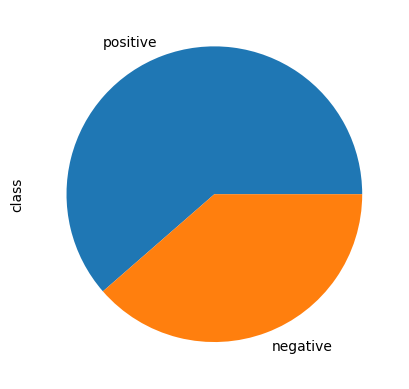

In [ ]:
# Ejemplo de gráfica para una idea de las distribuciones
# En este caso... todo está medianamente equilibrado
# En la vida real es diferente
dataset['class'].value_counts().plot.pie()

<ipython-input-10-6533168483e9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=dataset.corr(), annot=True)


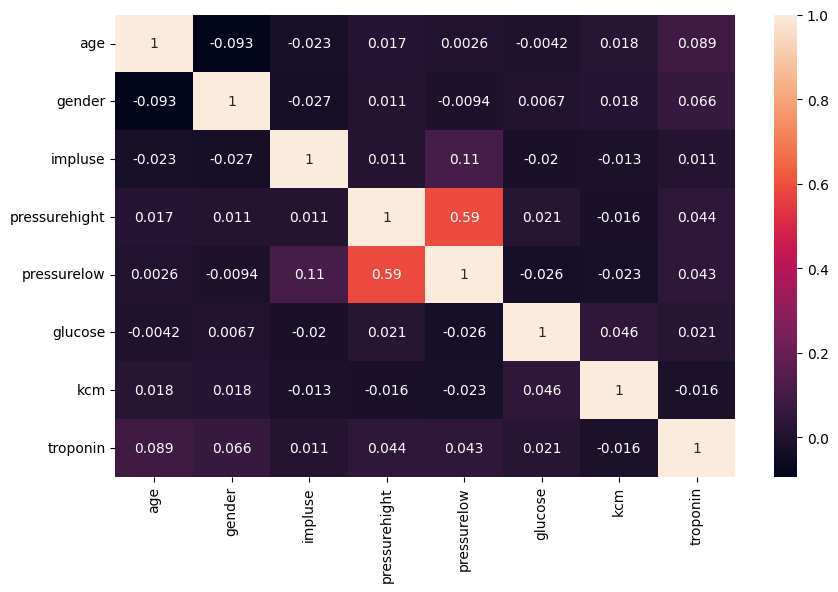

In [ ]:
# Mapa de correlaciones, se puede observar dependencias entre columnas. Permite descartar descriptores que no aportan información nueva por ejemplo (resta costo computacional, etc.)
# Antes de plantear cualquier modelo, existe un gran trabajo de procesamiento y análisis de los datos. Herramientas Estadísticas juegan un roll fundamental.
sns.heatmap(data=dataset.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# En este caso, por ejemplo, no se observan fuertes relaciones entre las variables. Por lo tanto, en principio existe información útil en todas.
# NOTA: variables aletorias tampoco estarán correlacionadas, pero en este punto, asumimos que anteriormente validamos que estas variables "tienen que ver" con nuestro problema.

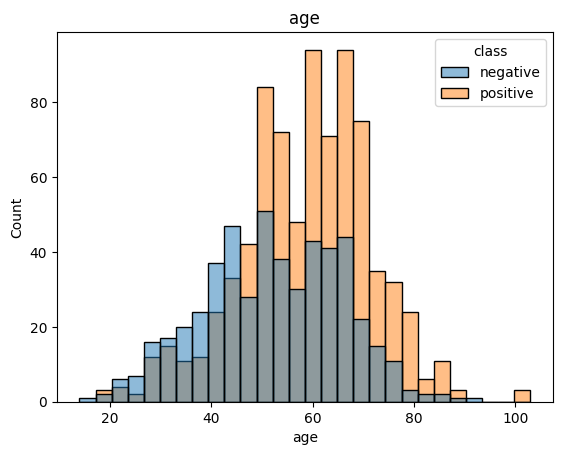

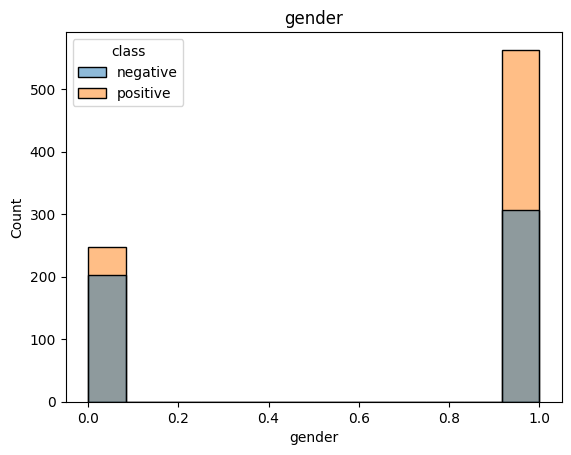

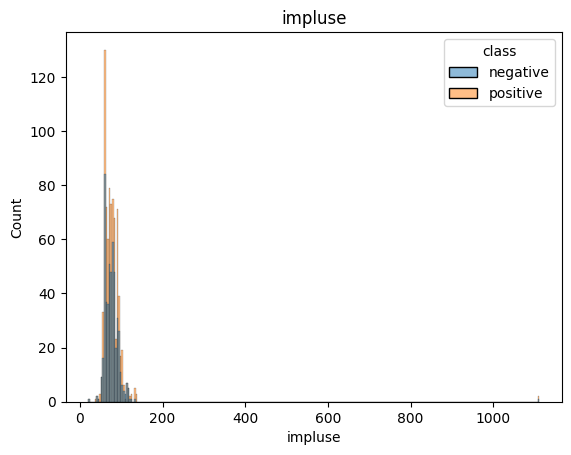

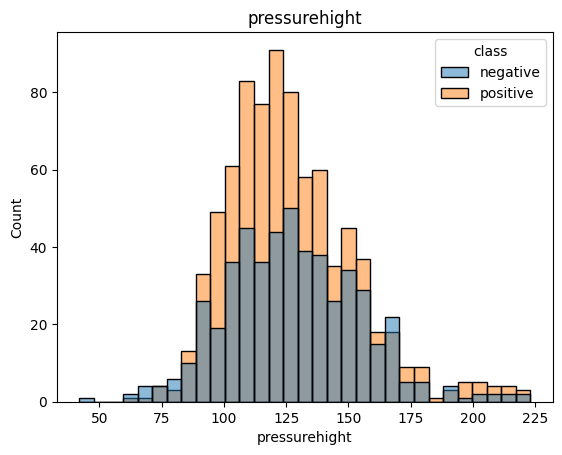

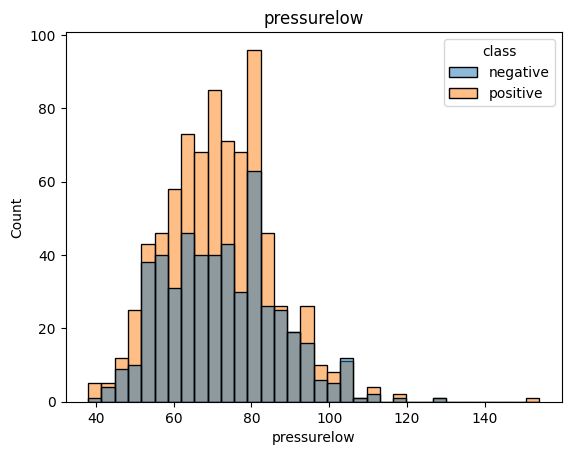

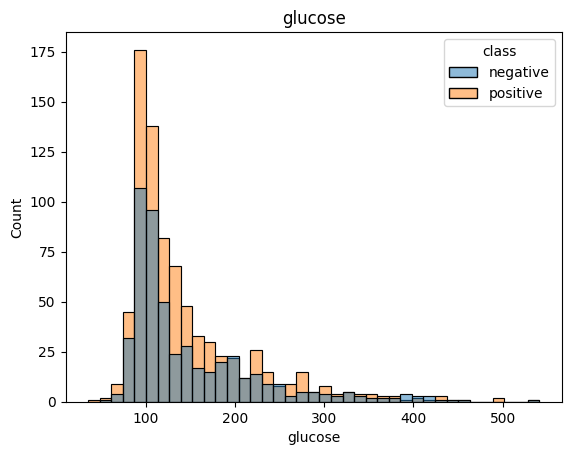

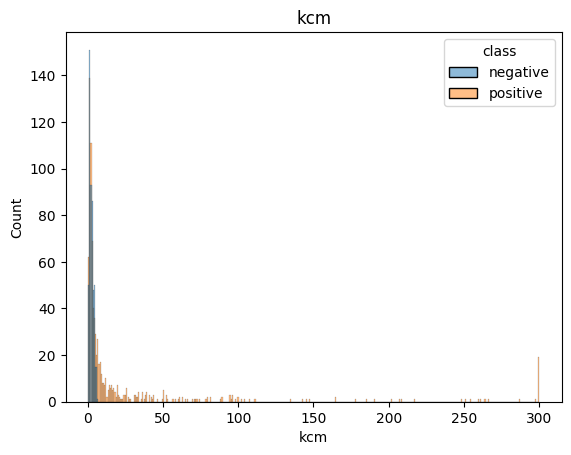

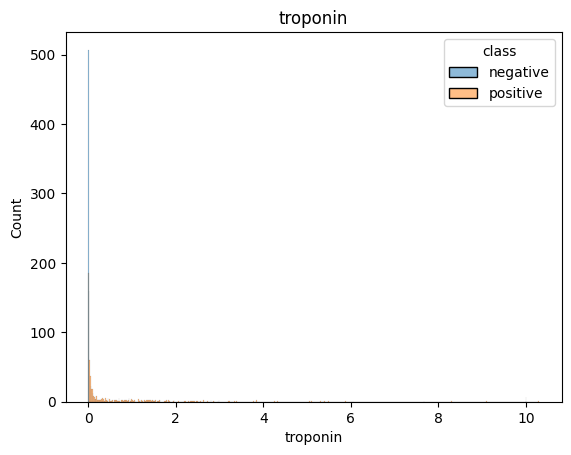

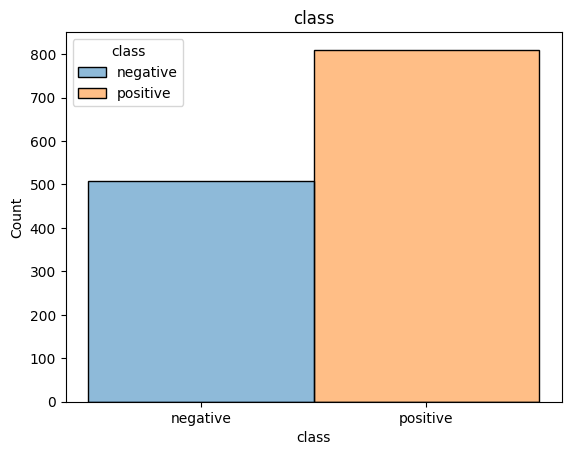

In [ ]:
# Más ejemplos de gráficas. Distribuciones respecto a la salida
for col in dataset.columns:
    plt.title(col)
    sns.histplot(data=dataset, x = col, hue='class')
    plt.show()

# Se aprecia por ejemplo, que existen superposiciones en los rangos de las variables. Por lo tanto, no sería tan sencillo clasificar las clases de salida
# y obtener una precisión buena con simples secuencias de selección (IF anidados por ejemplo, en dónde se establece un umbral estricto).

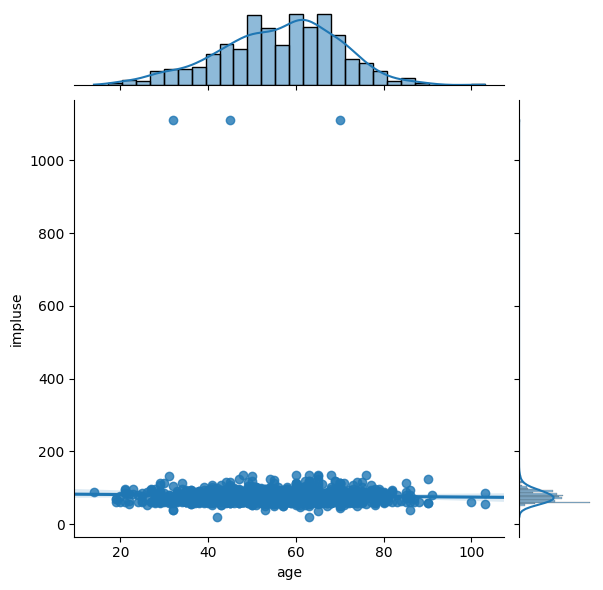

In [ ]:
# Para visualizar con mayor detalle la posible correlación entre dos variables numéricas.
g = sns.jointplot(x="age", y="impluse", data=dataset,
                  kind="reg", truncate=False)

**Seaborn** es ideal para estudios estadísticos. Va un ejemplo más.

El uso de *PairGrid* puede brindar un resumen muy rápido y de muy alto nivel de las relaciones interesantes del conjunto de datos.

Una forma muy común de usar esta gráfica es coloreando las observaciones por una variable categórica separada.

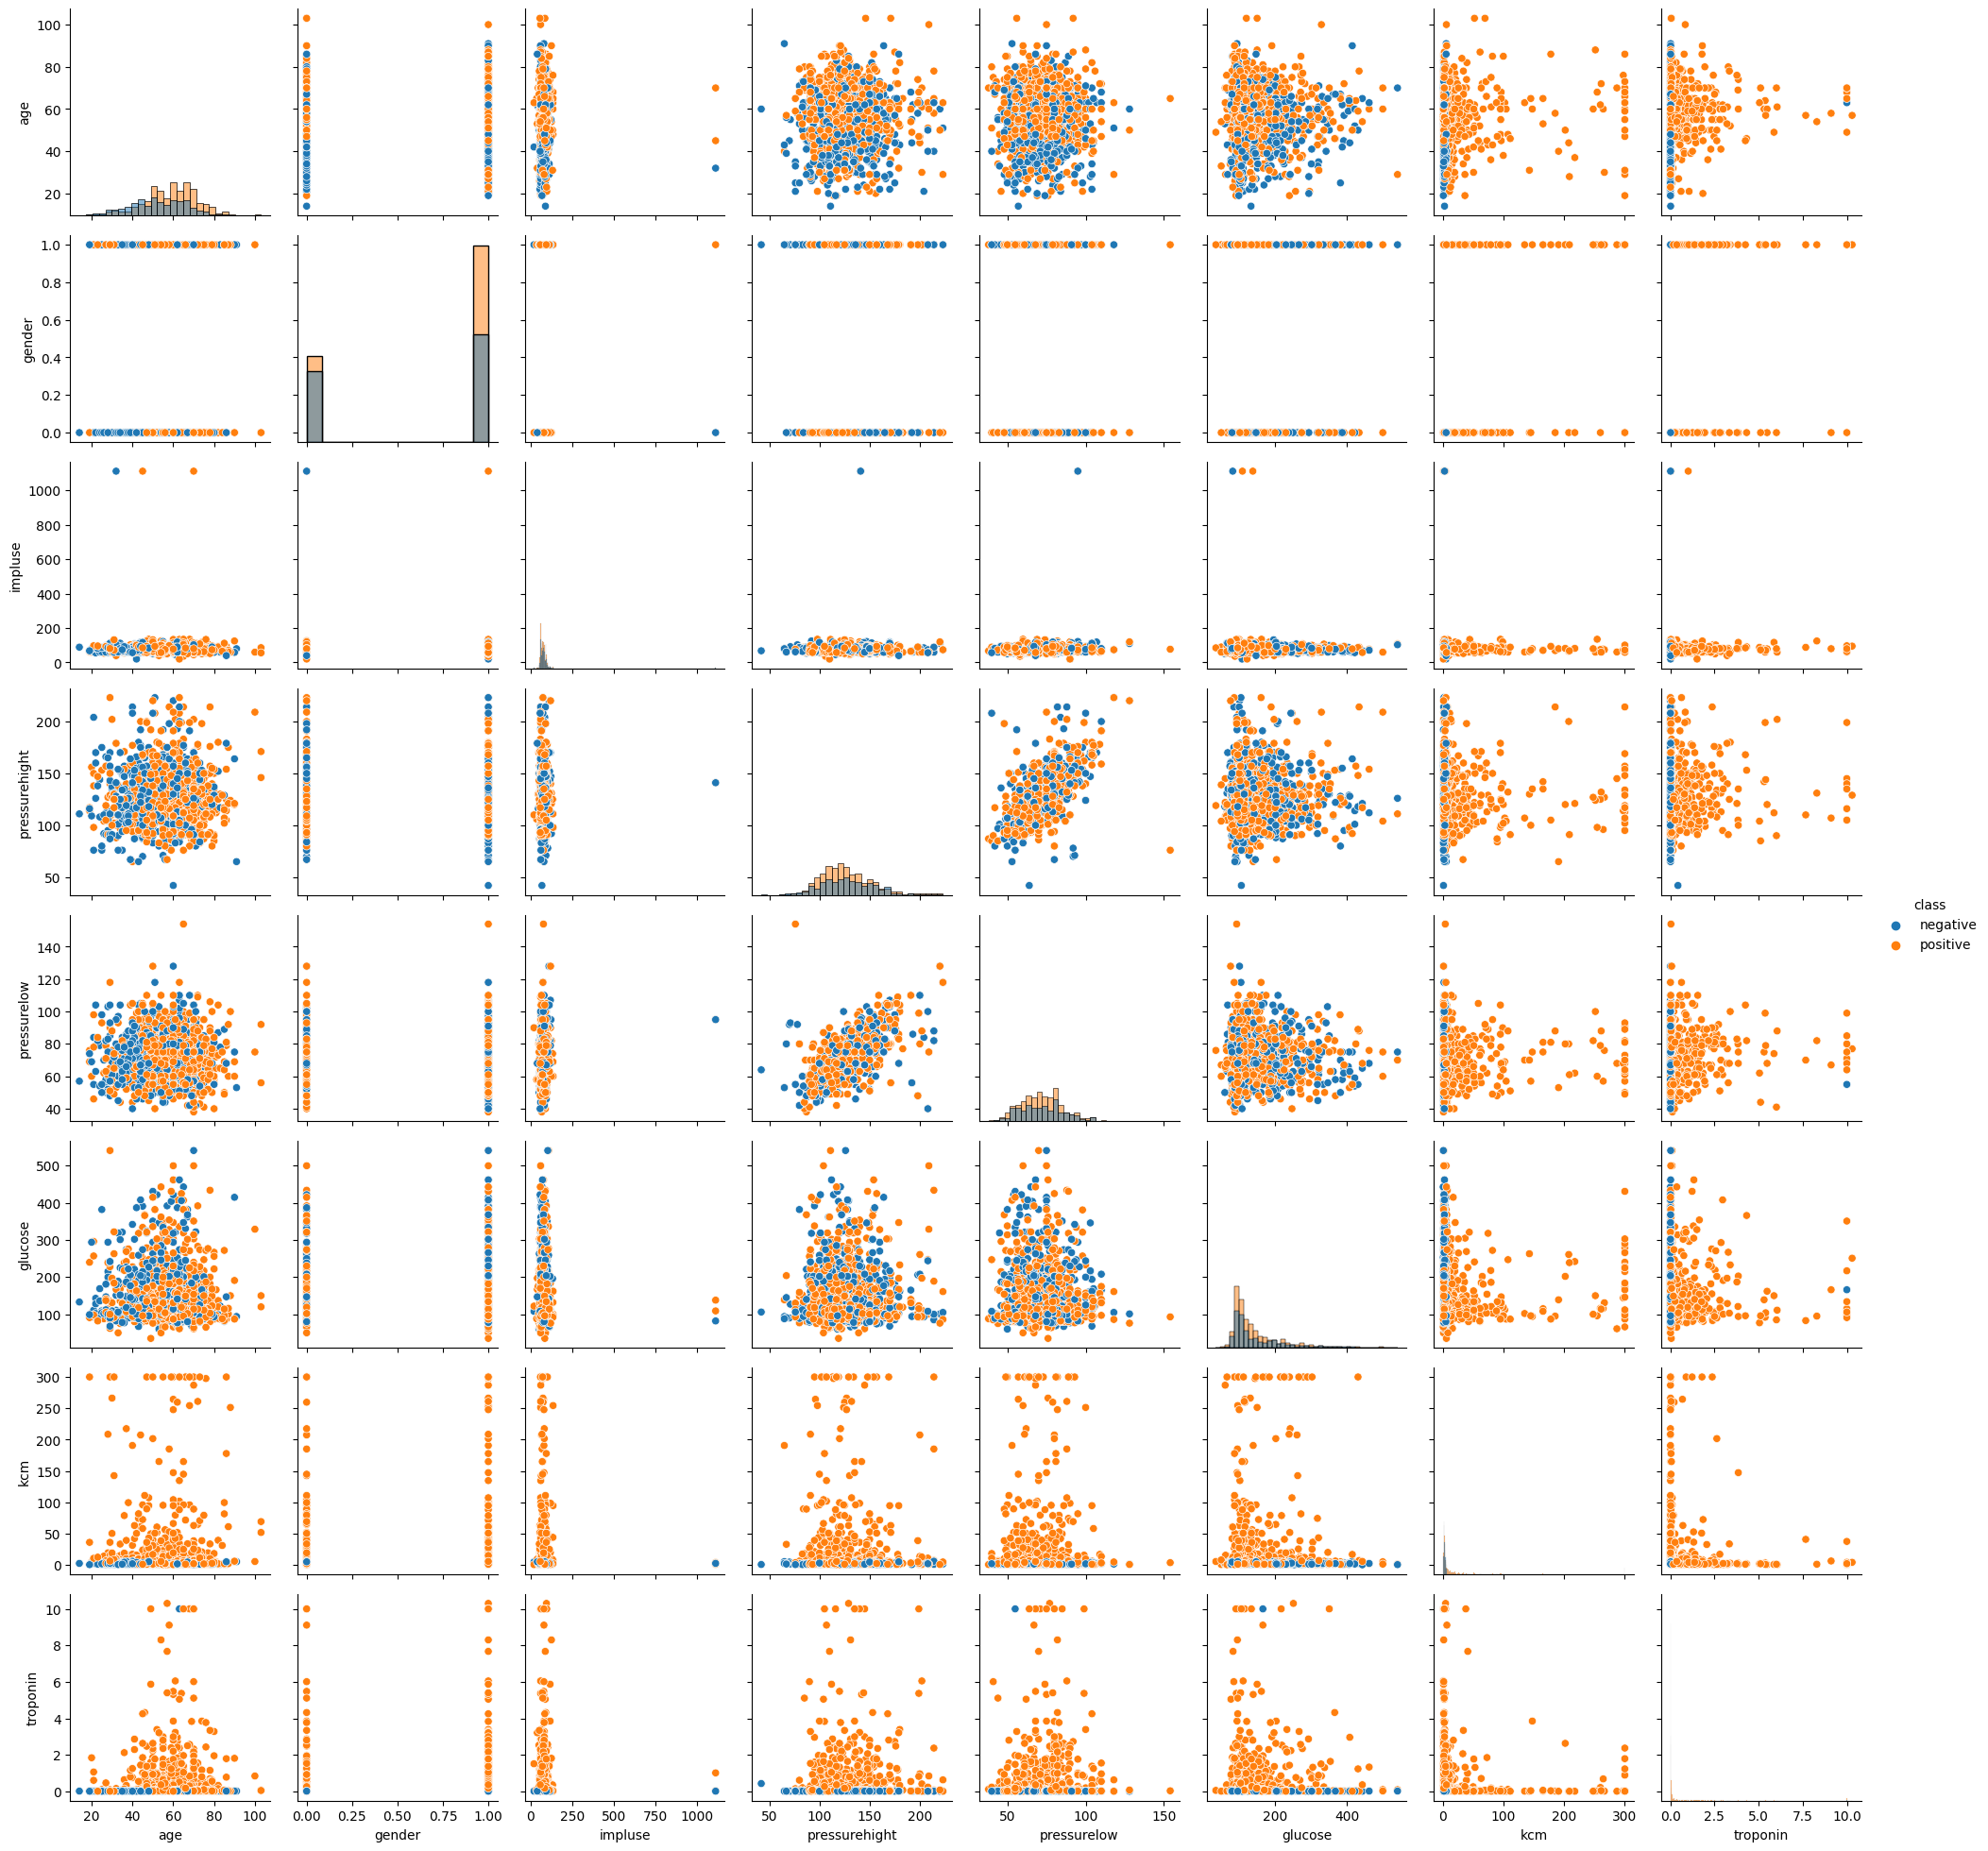

In [ ]:
g = sns.PairGrid(dataset, hue="class")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [ ]:
# Tratamiento de los datos y división del dataset

# Definición de la columna de salida esperada (aprendizaje supervisado)
y = dataset.pop('class')
print("Y antes:\n", y[:5])

# Preprocesamiento
# Se codifica numéricamente las categorías definidas con etiquetas. Ej.: en lugar de “Joven” y “Adulto” en la clase, queda 0 y 1.
le = LabelEncoder()

y = le.fit_transform(y)     # Con le.inverse_transform() recuperamos luego la etiqueta original
print("Y despues: ", y[:5])

Y antes:
 0    negative
1    positive
2    negative
3    positive
4    negative
Name: class, dtype: object
Y despues:  [0 1 0 1 0]


In [ ]:
y.shape

(1319,)

In [ ]:
# Cantidad de datos a procesar.
print("Tamaño actual - Salida:", y.shape)

Tamaño actual - Salida: (1319,)


In [ ]:
X = np.asarray(dataset) # Esto se puede hacer directamente porque para "y" se usó pop sobre el dataframe.
print("Tamaño actual - Entrada:", X.shape) # Es importante que el tamaño sea consistente entre X e Y (Entrada y Salida).

Tamaño actual - Entrada: (1319, 8)


In [ ]:
# División del dataset
# test_size: indica el porcentaje destinado a test/validacion
# random_state: un valor aleatorio cualquiera, sirve para garantizar repetibilidad. En este caso, en referencia a la subdivisión del set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

In [ ]:
X_train.shape

(1055, 8)

In [ ]:
X_test.shape

(264, 8)

# Clasificación

**Comparación de Clasificadores**

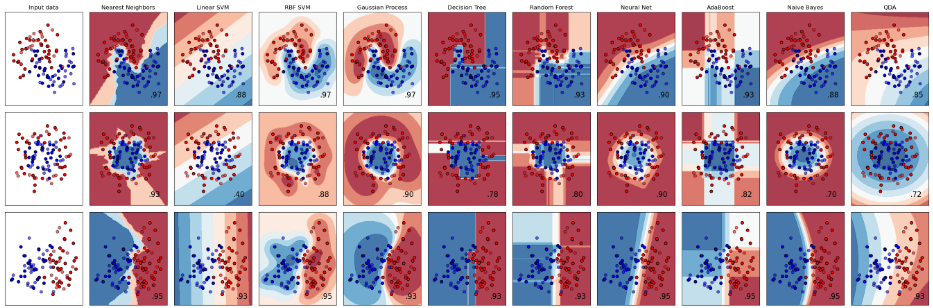

In [ ]:
# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Grafica Matrix de confusión

In [ ]:
def plot_confusion_matrix(y_true, y_preds, labels=None, model_name=None, normalize=None):
    """
    Función para graficar la Matrix de confusión
    y_true: vector de salida real
    y_predic: vector de salida predicho por el modelo
    labels: opcional, para nombrar las clases. Lista con strings
    model_name: opcional, para poner un título al gráfico
    normalize: {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    """
    if normalize:
        cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    else:
        cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()
    cmd.ax_.set(xlabel='Clase Predicha', ylabel='Clase Real')
    if model_name:
        cmd.ax_.set(title=model_name)

## Regresión Logística

In [ ]:
# Modelos para clasificación
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression()    # Se instancia el modelo, parámetros por defecto
modelo_lr.fit(X_train, y_train)   # Datos para entrenar, Entrada y Salida.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred_lr = modelo_lr.predict(X_test)   # Con la Entrada para test, se evalúa la predicción de Clase del modelo

Podemos comparar visualmente uno a uno los elementos, no suele ser lo que se hace. Cómo hay pocos... va una visualización rápida

In [ ]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
pred_lr

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [ ]:
print("Reporte de Clasificación: \n", classification_report(y_test, pred_lr))   # Se computan métricas comparando lo que debería de ser la salida con lo que predijo el modelo

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       106
           1       0.82      0.83      0.82       158

    accuracy                           0.79       264
   macro avg       0.78      0.78      0.78       264
weighted avg       0.79      0.79      0.79       264



### **Pequeña defición de lo que se ve en la tabla del reporte:**

**Precision** es la proporción de predicciones positivas que fueron correctas. Es decir, cuántos de los casos que tu modelo predijo como positivos, realmente eran positivos.

**Recall** es la proporción de casos reales positivos que fueron correctamente identificados. O sea, de todos los casos positivos reales, cuántos pudo identificar tu modelo.

**F1-score** es la media armónica de precision y recall. Resume la precisión y sensibilidad de un modelo en una sola métrica.

**Support** indica el número de muestras de cada clase que se usaron para calcular las métricas.

+ Precision: ¿Qué tan precisas son las predicciones positivas?
+ Recall: ¿Qué fracción de los reales positivos se detectó?
+ F1-score: Balance entre precisión y recall
+ Support: Número de muestras por clase.

A la hora de la verdad, lo ideal es que todo esté en `1`. `0` es lo peor.

La parte de abajo de la tabla, presenta métricas globales para todas las clases. Incluso ponderando la cantidad de muestras.

**Macro avg**: Es el promedio simple de las métricas calculadas por clase. Es decir, calcula la métrica (precision, recall, f1-score) por cada clase de forma independiente, y luego promedia esos valores. No tiene en cuenta el tamaño de clase.

**Weighted avg**: Es el promedio ponderado de las métricas calculadas por clase. Toma en cuenta la frecuencia o tamaño de cada clase para calcular el promedio. Le da más peso a las clases más grandes.

+ Macro avg: Promedio simple de métricas por clase. No considera tamaños.
+ Weighted avg: Promedio ponderado por clase. Considera tamaños de clase.

Usar macro avg nos da la métrica promedio sin importar la distribución. Weighted avg considera la prevalencia de clases y puede ser más representativo.

Según el problema, los tipos de datos y demás... conviene mirar una u otra métrica. Ciertos modelos, pueden funcionar mejor para resaltar alguna de ellas.

En nuestro ejemplo "sencillo", justo todo da perfecto.

In [ ]:
le.classes_     # Categorías guardadas en el label encoder

array(['negative', 'positive'], dtype=object)

In [ ]:
labels = le.inverse_transform((0, 1))    # Podemos pedir la trasformación inversa, es decir, de las etiquetas numéricas a la categórica en string

In [ ]:
labels

array(['negative', 'positive'], dtype=object)

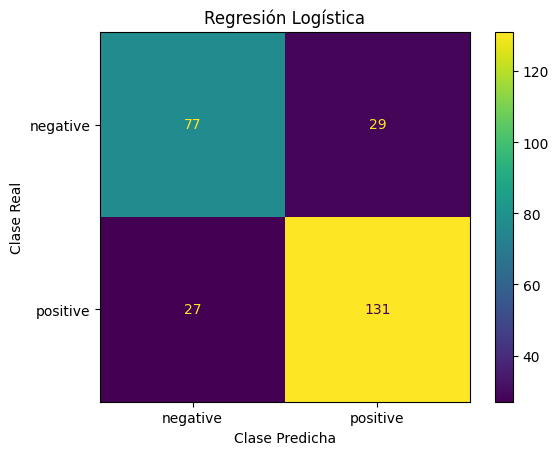

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_lr, labels=labels, model_name="Regresión Logística")

Ahora... se confunde bastante el modelo.

### Balance de Clases

Algunos modelos, permiten dar un peso diferente a cada clase. Es decir, que el hecho de equivocarse en la clasificación de determinada categoría, implique una penalización mayor o menor.
Para dominios de enfermedad, por lo general, es prioritario encontrar a todos los pacientes afectados.

In [ ]:
modelo_lr_pesos = LogisticRegression(class_weight={0:1, 1:2})    # Este argumento, cambia el peso de las clases. 1 vendría a ser la positiva para infarto.
                                                                 # Le damos una importancia de 2 respecto a 1 para no infarto.
                                                                 # Estos valores en los pesos dependen del problema, naturaleza de los datos y demás.
                                                                 # En algunos dominios de problema, este peso podría conocerse (qué tanto cuesta no detectar a alguien enfermo, por ejemplo)
modelo_lr_pesos.fit(X_train, y_train)   # Datos para entrenar, Entrada y Salida.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1, 1: 2})

In [ ]:
pred_lr_pesos = modelo_lr_pesos.predict(X_test)

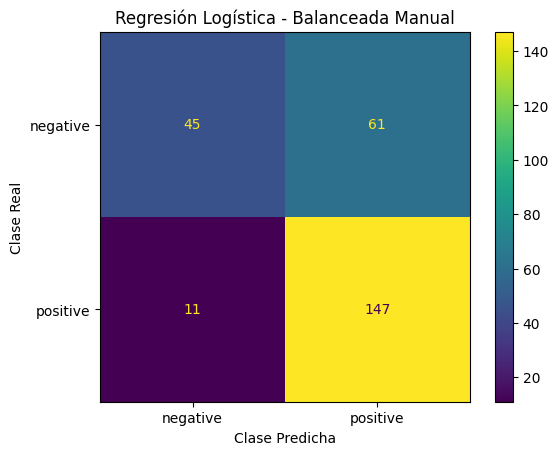

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_lr_pesos, labels=labels, model_name="Regresión Logística - Balanceada Manual")

Ahora, únicamente 11 no son detectados de los que son susceptibles a infarto.
Pero, a 61 se les dice que probablemente lo tengan.
Si miramos métricas globales, es posible que este modelo sea peor. Pero conseguir disminuir un tipo específico de error.

En este caso, aumentamos bastante el recall sobre la clase 1 (positivo para infarto), en decir, los encontramos a casi todos.

In [ ]:
print("Reporte de Clasificación: \n", classification_report(y_test, pred_lr_pesos))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.80      0.42      0.56       106
           1       0.71      0.93      0.80       158

    accuracy                           0.73       264
   macro avg       0.76      0.68      0.68       264
weighted avg       0.75      0.73      0.70       264



Este modelo, también tiene una heurística que balancea automáticamente los pesos de las diferentes clases. En ocasiones, podría ser un buen punto de partida.

In [ ]:
modelo_lr_balanced = LogisticRegression(class_weight="balanced", solver='lbfgs', max_iter=1000)    # Esta es la heurística balanceada, agregado también un nuevo límite para las iteraciones del algoritmo que resuelve (lo del ConvergenceWarning de arriba)

modelo_lr_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
pred_lr_balanced = modelo_lr_balanced.predict(X_test)

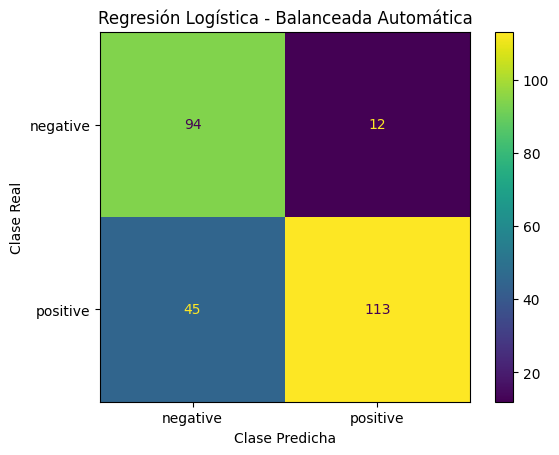

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_lr_balanced, labels=labels, model_name="Regresión Logística - Balanceada Automática")

In [ ]:
print("Reporte de Clasificación: \n", classification_report(y_test, pred_lr_balanced))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.68      0.89      0.77       106
           1       0.90      0.72      0.80       158

    accuracy                           0.78       264
   macro avg       0.79      0.80      0.78       264
weighted avg       0.81      0.78      0.79       264



En este caso, el balance automático mejoró la detecciones pero de la clase negativa.

Por eso siempre es importante saber bien qué se busca, y con eso definir el enfoque a usar y cuál es el mejor modelo.

## Árbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Entrenamiento
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)

# Predicciones
pred_tree = tree_clf.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, pred_tree))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       106
           1       0.99      0.99      0.99       158

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



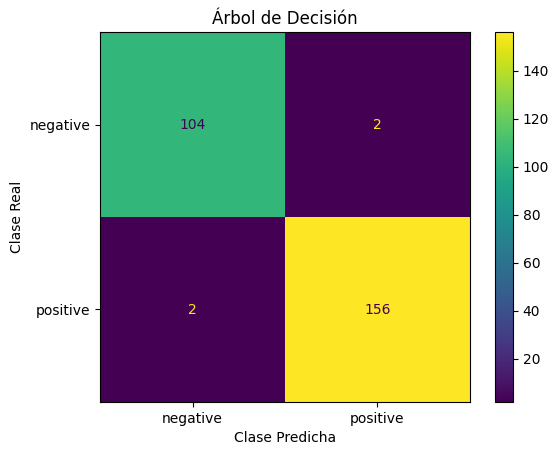

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_tree, labels=labels, model_name="Árbol de Decisión")

Este modelo parece que sigue siendo bueno en este problema.

In [ ]:
tree_clf.feature_importances_   # Este modelo permite saber la importancia que le dio a cada característica durante el ajuste de sus pesos.
                                # Está porcentual la salida. Y se corresponde con el orden de las características del arreglo de entrada.

array([0.00273252, 0.01752123, 0.        , 0.00399194, 0.        ,
       0.00351324, 0.38378527, 0.5884558 ])

Ahora quizá tenga más sentido analizar si hay variables que poco aportan. Con esa información, podemos simplificar tanto el proceso de toma de datos en la vida real, como los datos a procesar, el tamaño del modelo necesario, etc.

In [ ]:
dataset.columns   # El orden de las columnas del dataset es el orden de los números del vector de importancia

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin'],
      dtype='object')

Así suelto, poco nos dice pero... podemos armar una tablita y ordenar por valores.

In [ ]:
# Convert to DataFrame for easier visualization
df_importances = pd.DataFrame({
    'Variables': dataset.columns,
    'Importancia DTC': tree_clf.feature_importances_,
})

df_importances.sort_values(by='Importancia DTC', ascending=False)

,Variables,Importancia DTC
7,troponin,0.588456
6,kcm,0.383785
1,gender,0.017521
3,pressurehight,0.003992
5,glucose,0.003513
0,age,0.002733
2,impluse,0.000000
4,pressurelow,0.000000


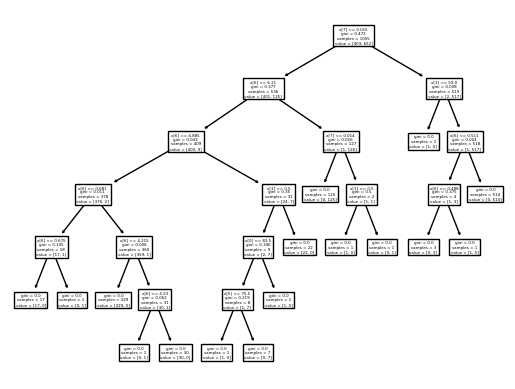

In [ ]:
from sklearn import tree
_ = tree.plot_tree(tree_clf)    # Este es un modelo que tiene una representación gráfica
                                # Podemos saber qué preguntas "se hace" el modelo y con cuál característica para identificar la clase de salida.

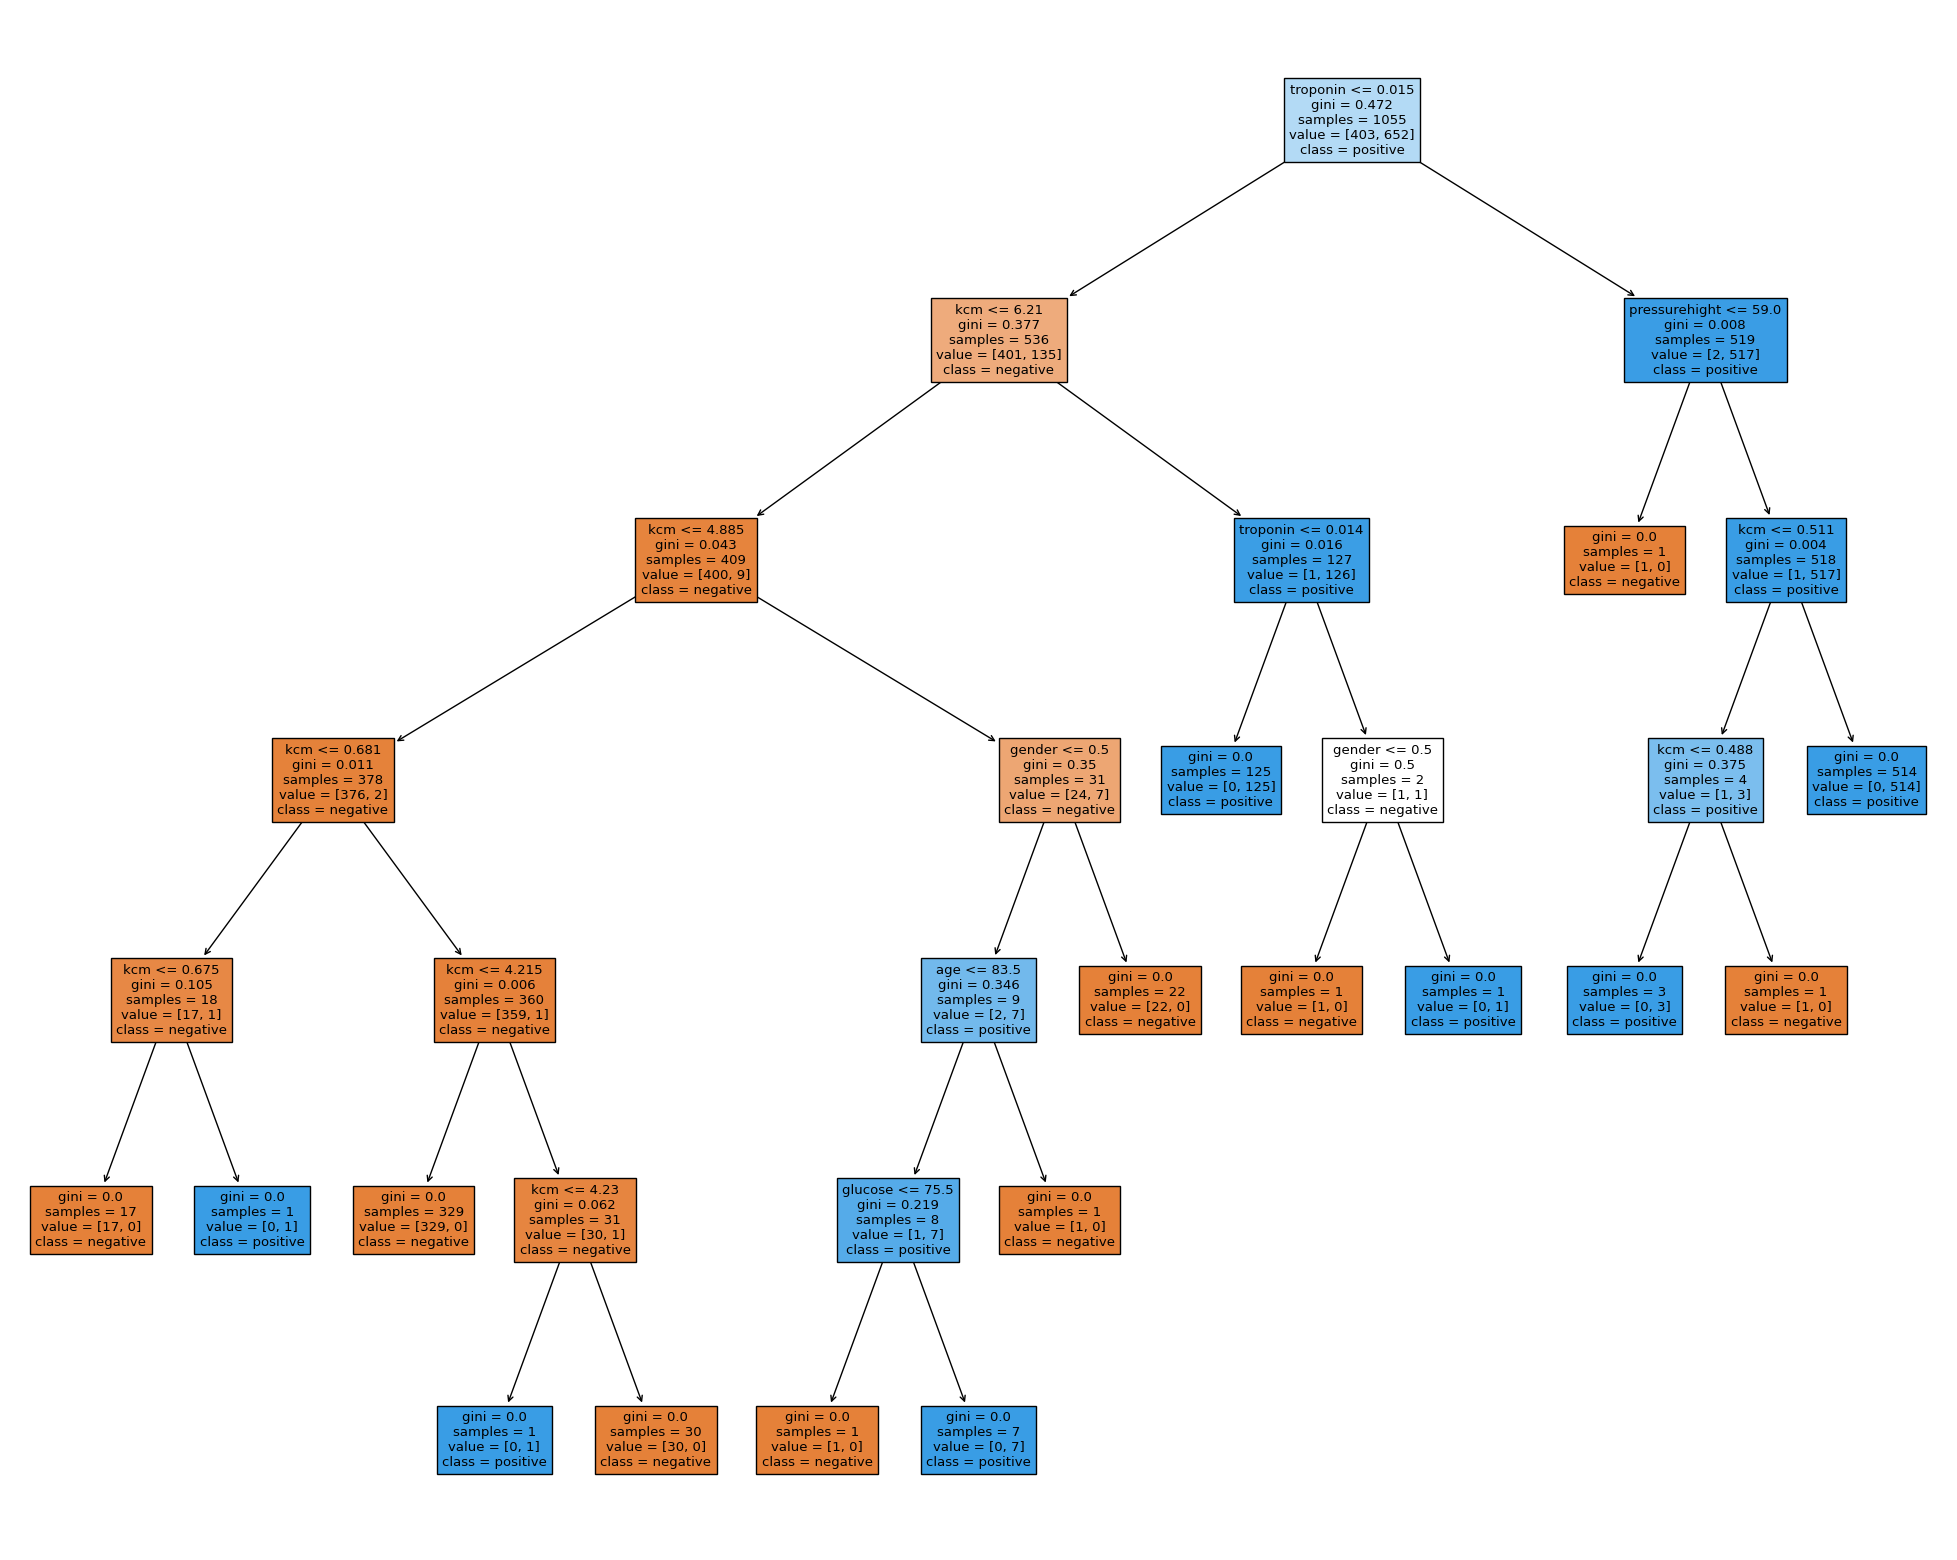

In [ ]:
fig = plt.figure(figsize=(25,20))   # Configuramos un tamaño mayor, para poder ver algo
_ = tree.plot_tree(tree_clf,
                        feature_names=dataset.columns,
                        class_names=labels,
                        filled=True)
fig.savefig("decision_tree.png")  # Guardamos la imagen también, por si se necesita

## Más Modelos: misma filosofía para entrenamiento y evaluación

Agrupo algunas métricas de interés para evaluar y comparar múltiples modelos.

Al final, la idea es tener una tabla que resuma todo. Con esto, decidir qué modelo es el que presenta las prestaciones que me sirven.

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, matthews_corrcoef # Diferentes métricas, hay más. Según el problema conviene mirar alguna o varias
import time

# DataFrame para una evaluación general al final
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','Time to Train','Time to Predict','Total Time'])

def muestra_metricas(model_name, y_test, y_predic, start_time=None, end_train_time=None, end_predict_time=None):
    """
    Función simple para personalizar las métrica a imprimir para cada modelo analizado.
    model_name: string con el nombre del modelo
    y_test: recibe el vector de salida real
    y_predic: recibe el vector de salida predicho por el modelo
    """

    accuracy = accuracy_score(y_test, y_predic)
    recall = recall_score(y_test, y_predic, average='weighted') # average permite definir cómo se computan estas métricas para múltiples clases de salida
    precision = precision_score(y_test, y_predic, average='weighted')
    f1s = f1_score(y_test, y_predic, average='weighted')
    MCC = matthews_corrcoef(y_test, y_predic)

    print("#######################################")
    print("Accuracy: "+ "{:.2%}".format(accuracy))
    print("Recall: "+ "{:.2%}".format(recall))
    print("Precision: "+ "{:.2%}".format(precision))
    print("F1-Score: "+ "{:.2%}".format(f1s))
    print("MCC: "+ "{:.2%}".format(MCC))    # Matthews correlation coefficient: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

    if (start_time != None and end_train_time != None and end_predict_time != None):
        print("Tiempo de entrenamiento: {:.4f} s".format(end_train_time-start_time))
        print("Tiempo de predicción: {:.4f} s".format(end_predict_time-end_train_time))
        print("Tiempo total: {:.4f} s".format(end_predict_time-start_time))

    print("#######################################")
    model_performance.loc[model_name] = [accuracy, recall, precision, f1s, MCC, end_train_time-start_time, end_predict_time-end_train_time, end_predict_time-start_time]

### Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_lr = lr_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_lr))
muestra_metricas("LogisticRegression", y_test, pred_lr, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       106
           1       0.82      0.83      0.82       158

    accuracy                           0.79       264
   macro avg       0.78      0.78      0.78       264
weighted avg       0.79      0.79      0.79       264

#######################################
Accuracy: 78.79%
Recall: 78.79%
Precision: 78.73%
F1-Score: 78.75%
MCC: 55.73%
Tiempo de entrenamiento: 0.0300 s
Tiempo de predicción: 0.0003 s
Tiempo total: 0.0303 s
#######################################


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


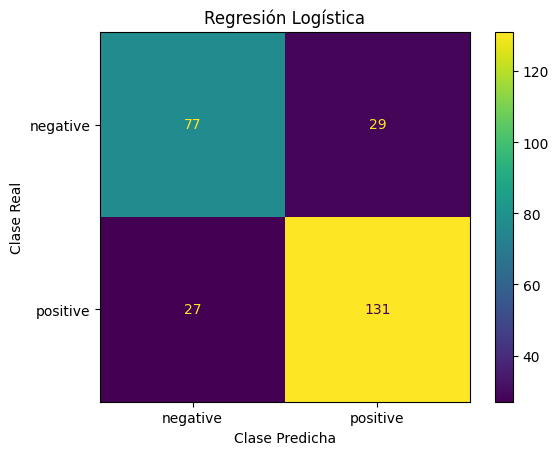

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_lr, labels=labels, model_name="Regresión Logística")

### Árbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_tree = tree_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_tree))
muestra_metricas("DecisionTreeClassifier", y_test, pred_tree, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       106
           1       0.99      0.99      0.99       158

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

#######################################
Accuracy: 98.48%
Recall: 98.48%
Precision: 98.48%
F1-Score: 98.48%
MCC: 96.85%
Tiempo de entrenamiento: 0.0065 s
Tiempo de predicción: 0.0004 s
Tiempo total: 0.0069 s
#######################################


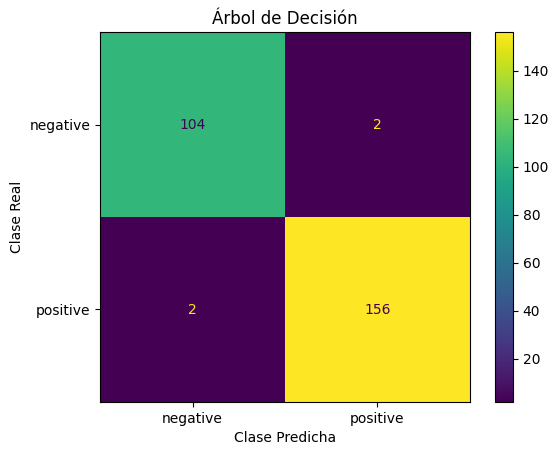

In [ ]:
plot_confusion_matrix(y_test, pred_tree, labels=labels, model_name="Árbol de Decisión")

### K Vecinos Cercanos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_knn = knn_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_knn))
muestra_metricas("KNeighborsClassifier", y_test, pred_knn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.52      0.55       106
           1       0.70      0.75      0.72       158

    accuracy                           0.66       264
   macro avg       0.64      0.63      0.63       264
weighted avg       0.65      0.66      0.65       264

#######################################
Accuracy: 65.53%
Recall: 65.53%
Precision: 65.03%
F1-Score: 65.17%
MCC: 27.14%
Tiempo de entrenamiento: 0.0024 s
Tiempo de predicción: 0.0149 s
Tiempo total: 0.0173 s
#######################################


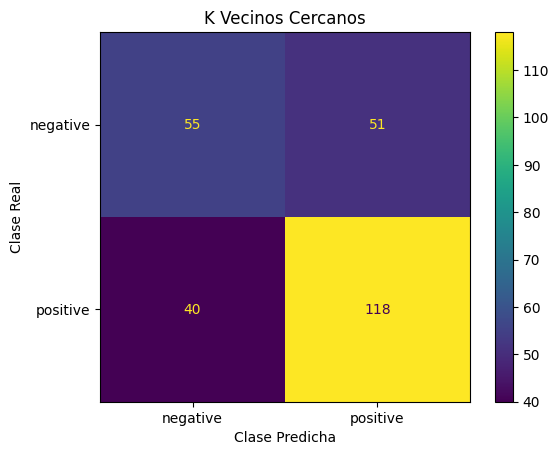

In [ ]:
plot_confusion_matrix(y_test, pred_knn, labels=labels, model_name="K Vecinos Cercanos")

### Red Neuronal

In [ ]:
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron classifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
# Por ahora... un perceptrón multicapa simple, después vemos topologías complejas
nn_clf = MLPClassifier((20,))  # hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
                                # The ith element represents the number of neurons in the ith hidden layer.
nn_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_nn = nn_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_nn))
muestra_metricas("Multi-layer Perceptron classifier", y_test, pred_nn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.75      0.72       106
           1       0.82      0.77      0.80       158

    accuracy                           0.77       264
   macro avg       0.76      0.76      0.76       264
weighted avg       0.77      0.77      0.77       264

#######################################
Accuracy: 76.52%
Recall: 76.52%
Precision: 77.03%
F1-Score: 76.66%
MCC: 52.04%
Tiempo de entrenamiento: 0.3831 s
Tiempo de predicción: 0.0007 s
Tiempo total: 0.3838 s
#######################################


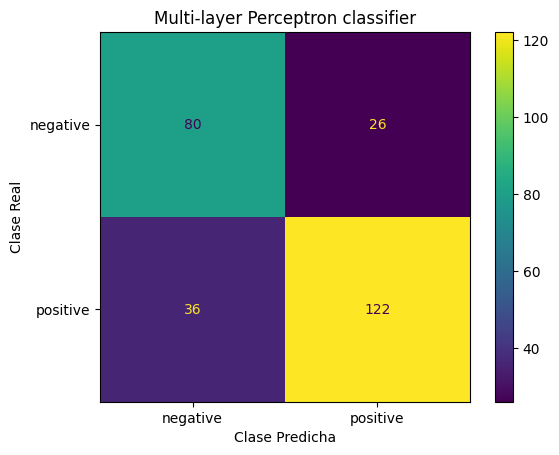

In [ ]:
plot_confusion_matrix(y_test, pred_nn, labels=labels, model_name="Multi-layer Perceptron classifier")

### Support Vector Machines (SVMs)

https://scikit-learn.org/stable/modules/svm.html#classification


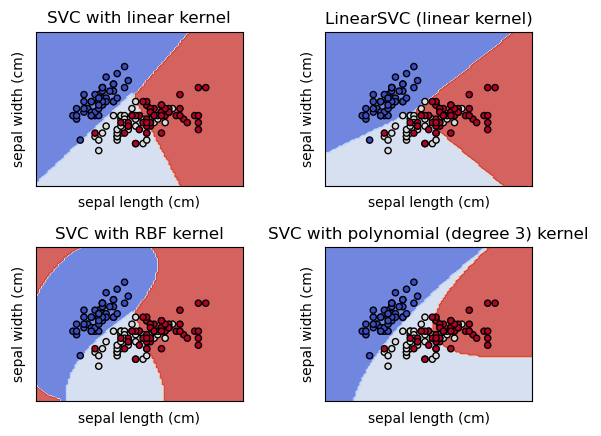

In [ ]:
from sklearn.svm import SVC

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_svm = svm_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_svm))
muestra_metricas("SVM", y_test, pred_svm, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.19      0.31       106
           1       0.64      0.97      0.77       158

    accuracy                           0.66       264
   macro avg       0.72      0.58      0.54       264
weighted avg       0.70      0.66      0.58       264

#######################################
Accuracy: 65.53%
Recall: 65.53%
Precision: 70.43%
F1-Score: 58.39%
MCC: 26.29%
Tiempo de entrenamiento: 0.0684 s
Tiempo de predicción: 0.0142 s
Tiempo total: 0.0826 s
#######################################


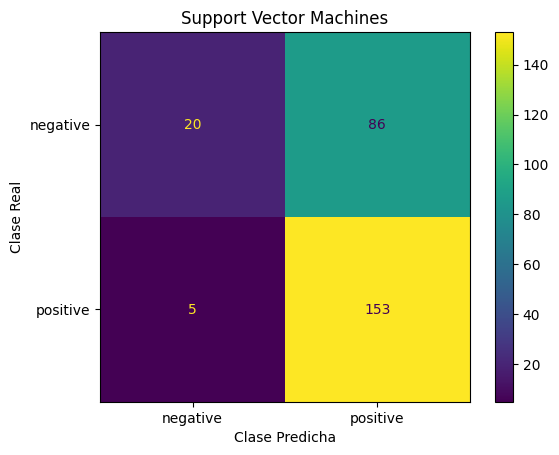

In [ ]:
plot_confusion_matrix(y_test, pred_svm, labels=labels, model_name="Support Vector Machines")

### Comparación de los Modelos

Para evaluar qué modelo se ajusta mejor a nuestros requerimientos.
Por ejemplo, si la velocidad de inferencia es crucial (tiempo en la consulta del modelo)... nos interesaría el menor tiempo a la hora de predecir.

In [ ]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'Time to Train':'{:.3f}',
                                                                     'Time to Predict':'{:.3f}',
                                                                     'Total Time':'{:.3f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,MCC score,Time to Train,Time to Predict,Total Time
LogisticRegression,78.79%,78.79%,78.73%,78.75%,55.73%,0.030,0.000,0.030
DecisionTreeClassifier,98.48%,98.48%,98.48%,98.48%,96.85%,0.007,0.000,0.007
KNeighborsClassifier,65.53%,65.53%,65.03%,65.17%,27.14%,0.002,0.015,0.017
Multi-layer Perceptron classifier,76.52%,76.52%,77.03%,76.66%,52.04%,0.383,0.001,0.384
SVM,65.53%,65.53%,70.43%,58.39%,26.29%,0.068,0.014,0.083


## Desempeño sin las características poco importantes para Árboles

In [ ]:
dataset_opt = dataset.copy()

In [ ]:
dataset_opt.drop(['age', 'pressurehight', 'glucose', 'impluse', 'pressurelow'], axis=1, inplace=True)

In [ ]:
X = np.asarray(dataset_opt)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

In [ ]:
X_train.shape

(1055, 3)

## Árbol de Decisión, 3 características

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Entrenamiento
tree_clf_opt = DecisionTreeClassifier(random_state=1, max_depth=3)
tree_clf_opt.fit(X_train, y_train)

# Predicciones
pred_tree_opt = tree_clf_opt.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, pred_tree_opt))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       106
           1       0.99      0.97      0.98       158

    accuracy                           0.98       264
   macro avg       0.97      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



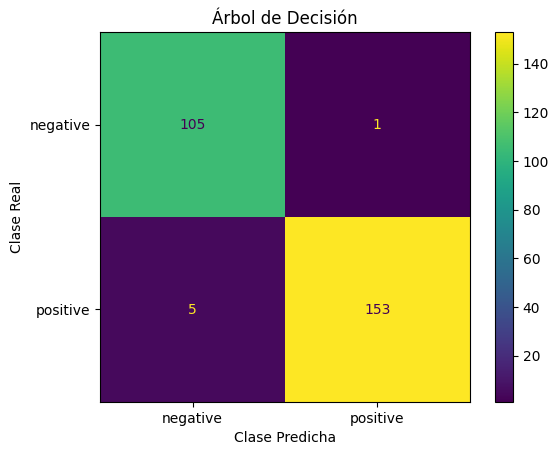

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_tree_opt, labels=labels, model_name="Árbol de Decisión")

El desempeño sigue siendo casi el mismo, pero redujimos considerablemente la cantidad de datos que se usan.

In [ ]:
tree_clf_opt.feature_importances_   # Este modelo permite saber la importancia que le dio a cada característica durante el ajuste de sus pesos.
                                # Está porcentual la salida. Y se corresponde con el orden de las características del arreglo de entrada.

array([0.        , 0.38670737, 0.61329263])

Ahora quizá tenga más sentido analizar si hay variables que poco aportan. Con esa información, podemos simplificar tanto el proceso de toma de datos en la vida real, como los datos a procesar, el tamaño del modelo necesario, etc.

In [ ]:
dataset_opt.columns   # El orden de las columnas del dataset es el orden de los números del vector de importancia

Index(['gender', 'kcm', 'troponin'], dtype='object')

Así suelto, poco nos dice pero... podemos armar una tablita y ordenar por valores.

In [ ]:
# Convert to DataFrame for easier visualization
df_importances = pd.DataFrame({
    'Variables': dataset_opt.columns,
    'Importancia DTC': tree_clf_opt.feature_importances_,
})

df_importances.sort_values(by='Importancia DTC', ascending=False)

,Variables,Importancia DTC
2,troponin,0.613293
1,kcm,0.386707
0,gender,0.000000


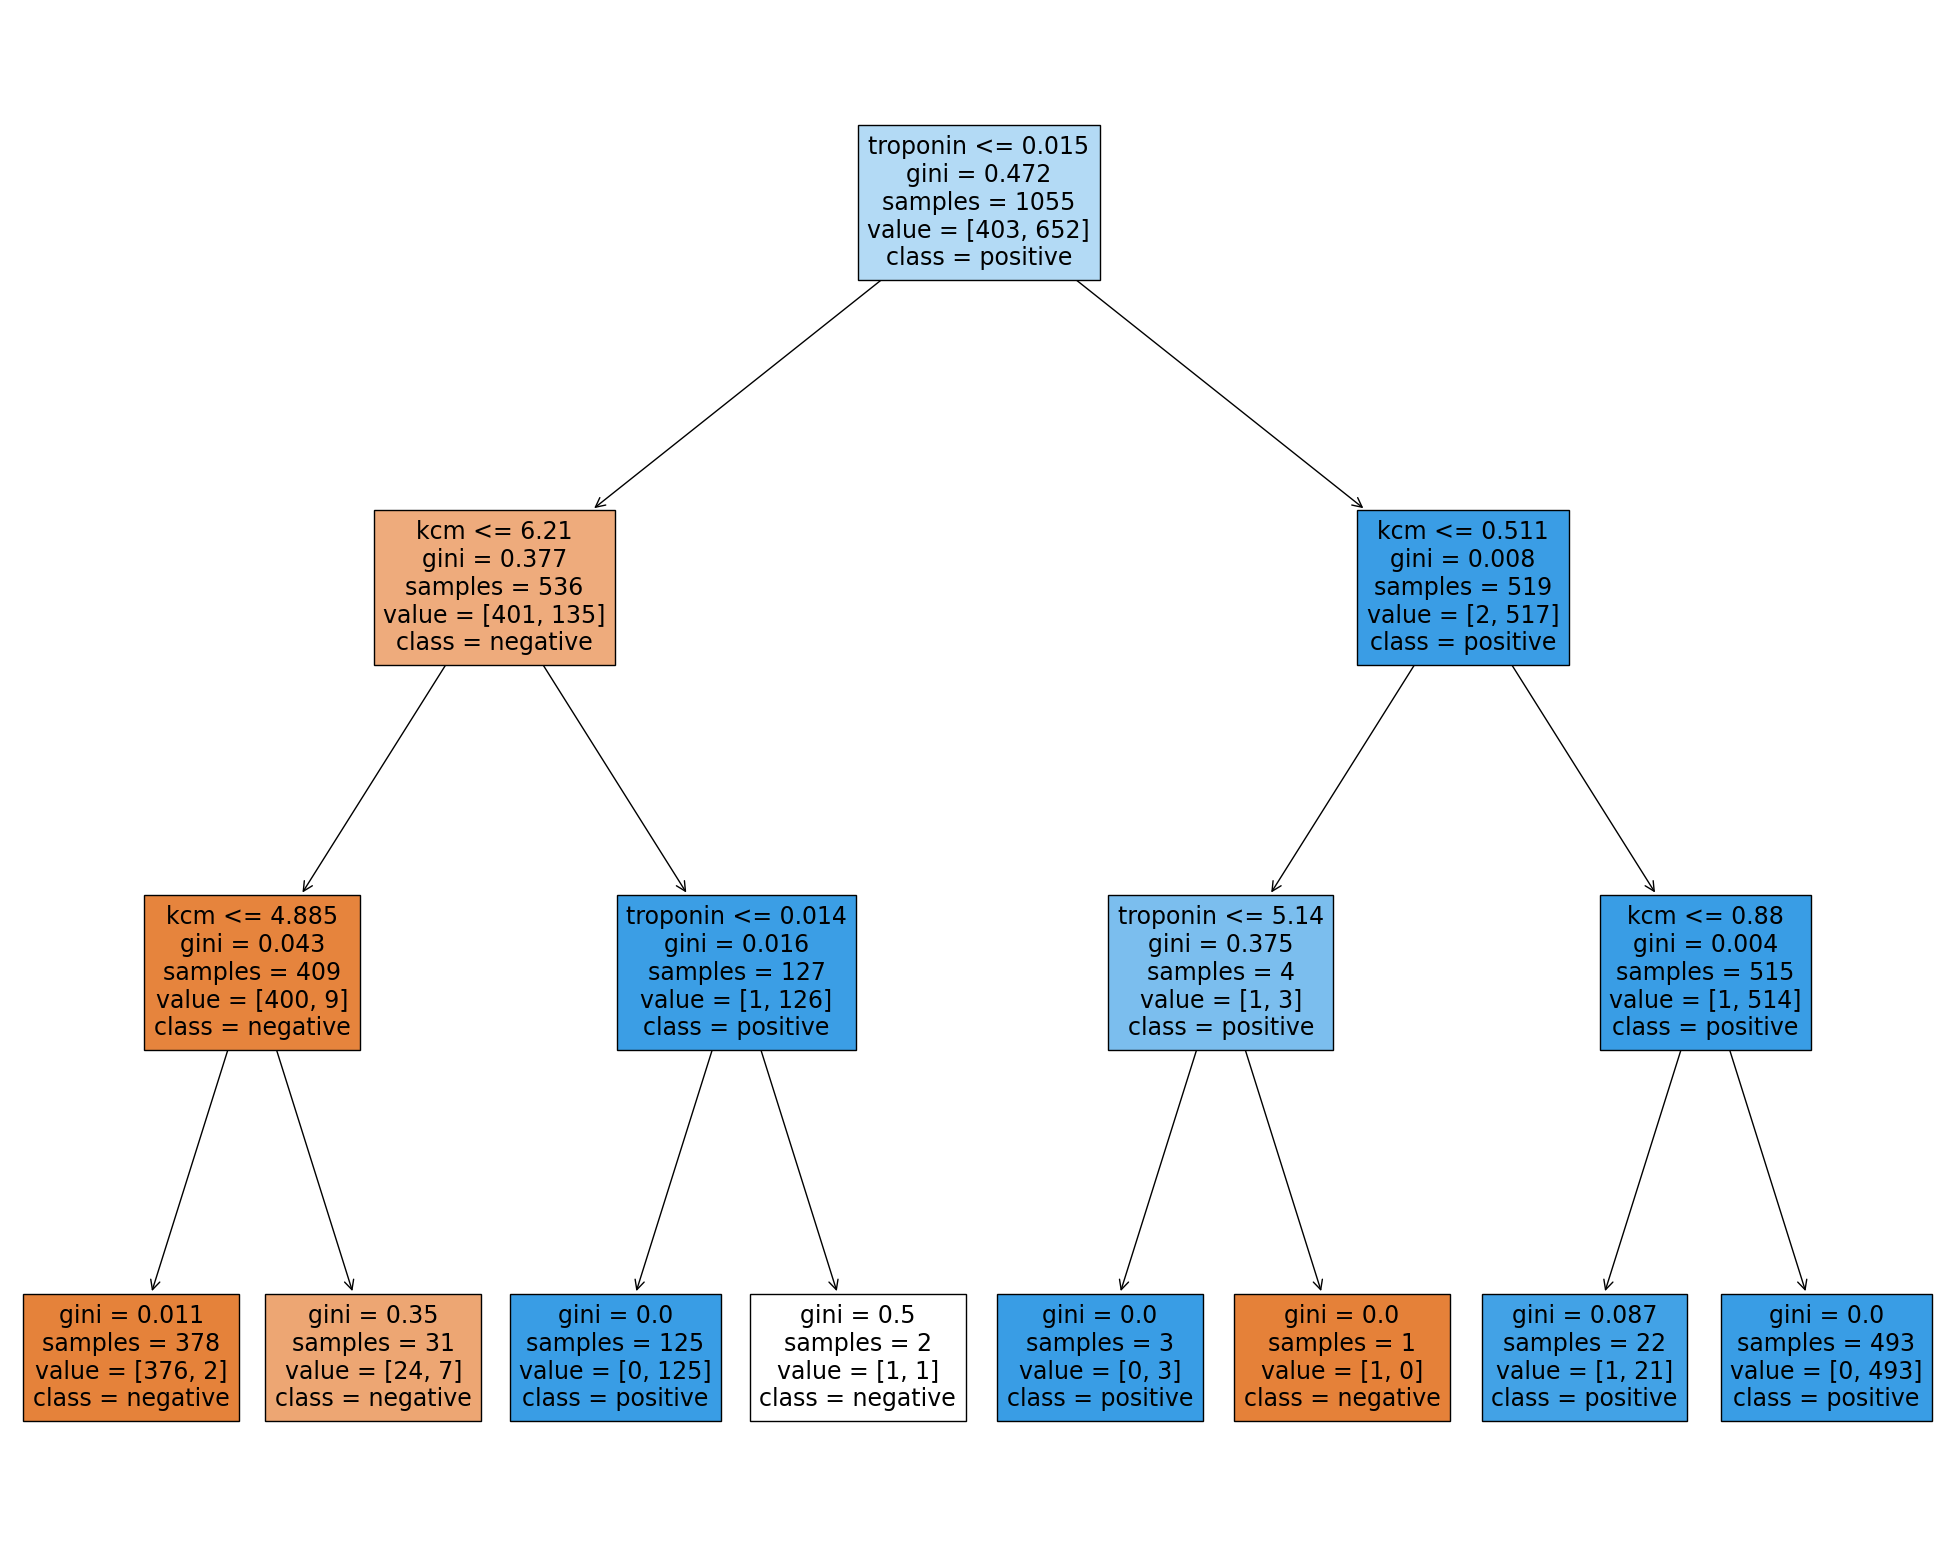

In [ ]:
fig = plt.figure(figsize=(25,20))   # Configuramos un tamaño mayor, para poder ver algo
_ = tree.plot_tree(tree_clf_opt,
                        feature_names=dataset_opt.columns,
                        class_names=labels,
                        filled=True)
fig.savefig("decision_tree_opt.png")  # Guardamos la imagen también, por si se necesita

¿Es correcto que se haga tantas preguntas?

# Meta-Clasificadores (Bagging, Stacking)

Los meta-clasificadores son técnicas que combinan múltiples modelos para mejorar el rendimiento. Bagging (Bootstrap Aggregating) es un método de ensemble learning que crea múltiples modelos a partir de distintas muestras  del conjunto de datos original y luego promedia sus predicciones.

**Concepto**

El Bagging funciona generando múltiples versiones de un modelo base, entrenando cada modelo en un subconjunto aleatorio de los datos de entrenamiento. Luego se hace un promedio/votación de las predicciones de todos los modelos para obtener una predicción final más robusta.

**Ventajas**

* Reduce la varianza al promediar predicciones de modelos diversos entrenados en distintos subsets de datos.
* Mejora el rendimiento de modelos inestables como árboles de decisión (tienden a sobre-ajustarse).
* Es un ensemble learning simple de implementar.
* Es aplicable a muchos tipos de modelos base, no solo árboles.


**Ejemplos de algoritmos Bagging:**

* Random Forest: conjunto de árboles de decisión entrenados en distintas muestras bootstrap.
* AdaBoost: entrena modelos secuencialmente, asignando más peso a instancias mal clasificadas.

## Ejemplo ya implementado: Random Forest (Si puedo tener un Árbol, puedo tener un bosque)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

# Predicciones
pred_rf = rf_clf.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, pred_rf))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       106
           1       0.98      0.99      0.98       158

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



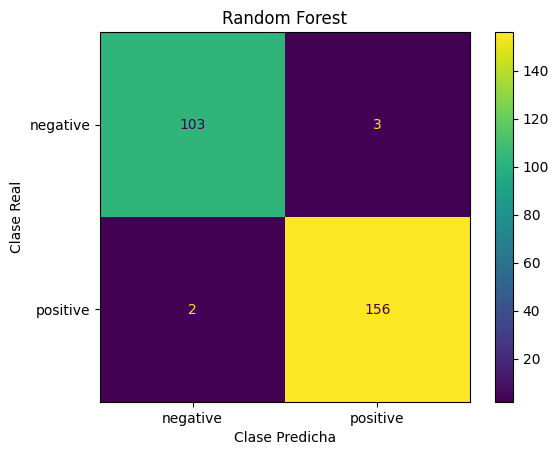

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_rf, labels=labels, model_name="Random Forest")

## Ejemplo con BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Esto sería casi lo que implementa RandomForest, un conjunto de varios árboles
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True
)

"""
Esto entrena 500 árboles de decisión, donde cada árbol se entrena en un
subconjunto aleatorio del 25% de las muestras (con reemplazo).
Luego se promedian las predicciones para obtener y_pred más robusto.
"""

bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, y_pred_bag))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       106
           1       0.99      0.98      0.98       158

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



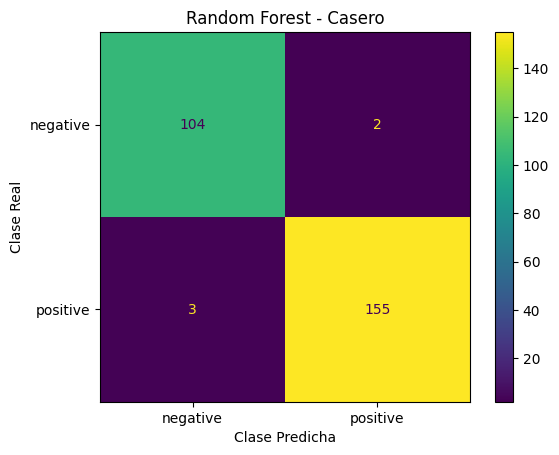

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, y_pred_bag, labels=labels, model_name="Random Forest - Casero")

## Ejemplo con múltiples clasificadores (Stacking)

Para obtener un modelo que combine varios modelos, puedes utilizar un enfoque de ensamblado llamado "Stacking" (apilamiento). El apilamiento es un meta-ensamblaje que combina múltiples modelos base para mejorar el rendimiento de la predicción

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Crear modelos base (en este ejemplo, un árbol de decisión, un SVM y un k-NN)
base_model_1 = DecisionTreeClassifier()
base_model_2 = SVC()
base_model_3 = KNeighborsClassifier()

# Crear un StackingClassifier  con los modelos base
stacking_model = StackingClassifier(estimators=[('DT', base_model_1), ('SVM', base_model_2), ('KNN', base_model_3)])

# Entrenar el BaggingClassifier en los datos de entrenamiento
stacking_model.fit(X_train, y_train)

# Predict
y_pred_stm = stacking_model.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, y_pred_stm))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       106
           1       0.99      0.99      0.99       158

    accuracy                           0.99       264
   macro avg       0.99      0.99      0.99       264
weighted avg       0.99      0.99      0.99       264



El *StackingClassifier* combina las predicciones de los modelos base y utiliza el meta-estimador para hacer la predicción final.

Este enfoque de apilamiento a menudo conduce a un mejor rendimiento predictivo en comparación con el uso de modelos individuales.

El meta-clasificador se define con el argumento `final_estimator`, por defecto es **LogisticRegression**.

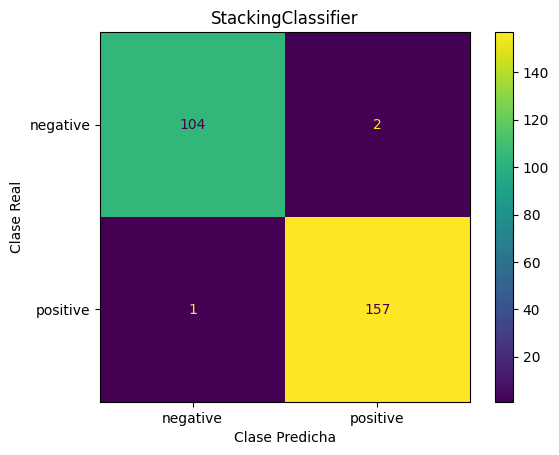

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, y_pred_stm, labels=labels, model_name="StackingClassifier")

# Referencias y Recursos

*   https://numpy.org/doc/stable/
*   https://pandas.pydata.org/
*   https://seaborn.pydata.org/
*   https://matplotlib.org/
*   https://matplotlib.org/stable/plot_types/index.html
*   https://scikit-learn.org/stable/supervised_learning.html
*   https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html